In [21]:
from sympy.matrices import Matrix 
import sympy as sp
import numpy as np
from Exercise import Exercise, MarkdownBlock

from helpers import *

import math
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.size': 10})

from process_latex import process_sympy 

try:
    from config import URL, TOKEN
except:
    None

# TODO: replace with supplied strings
Exercise.URL = URL
Exercise.TOKEN = TOKEN

In [3]:
m = r"What is $@a + @b$?"

params = {}
params["a"] = sp.Matrix(np.arange(4))
params["b"] = sp.Matrix(np.flip(np.arange(4)))

e = Exercise(MarkdownBlock(m, params))
e.add_answer(params["a"] + params["b"], True, "Correct!")
e.display()

e.write("vector_addition")
e.play()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=2236f84a-0ae5-4d6f-a1e5-fc1300f47e90


In [ ]:
m = r"What is $@trace$?"

params = {}
params["trace"] = sp.Trace(sp.Matrix(np.arange(16).reshape((4,4))))

e = Exercise(MarkdownBlock(m, params))

ans = params["trace"].doit()

e.add_answer(ans, True, MarkdownBlock("Correct! $@trace$", params))
e.display()

e.write("trace")
e.play()

In [ ]:
m = r"What is $@inverse$?"

params = {}
params["inverse"] = sp.Inverse(sp.Matrix([[-1, 3/2], [1, -1]]))

e = Exercise(MarkdownBlock(m, params))

ans = params["inverse"].doit()
params["ans"] = ans

e.add_answer(ans, True, MarkdownBlock("Correct! $@inverse = @ans$", params))
e.add_default_feedback(MarkdownBlock("Correct! $@inverse = @ans$", params))
e.display()

e.write("inverse")
e.play()

In [ ]:
def MatrixVectorMultiplication(RandomExercise):
    def query():
        return r"What is ... "
    
    def random_params():
        return {
            'a': np.random.randint(0, 10)
            ...
        }
    
    def answer(params):
        return params['a'] + params['b']
    
    def give_feedback(answer):
        if answer == 16:
            return "idiot"

In [123]:
def generator():
    m = r"What is $@a + @b$?"
    
    params = {}
    params["a"] = np.random.randint(0, 10)
    params["b"] = np.random.randint(10, 20)
    params["ans"] = params["a"] + params["b"]

    e = Exercise(MarkdownBlock(m, params))
    
    e.add_answer(params["ans"], True, MarkdownBlock("Yes!", params))
    e.add_default_feedback(MarkdownBlock("No!", params))
    
    return e

Exercise.write_multiple(generator=generator, instances_count=100, id="int_param")

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

In [23]:
def to_binary(array):
    return np.where(array > 7, 1, 0)

def show(array, filename, binary = True):
    data = to_binary(array) if binary else array 
    fig = plt.figure()
    plt.matshow(data, cmap='gray_r')
    plt.axis('off')
    plt.savefig("{}.png".format(filename), dpi=200, bbox_inches='tight')
    plt.close(fig)

# f, axarr = plt.subplots(1,10)
# unit = math.floor(len(nums)/10)
# start_offset = math.floor((1/2)*unit)
# for i in range(0, 10):
#     axarr[i].axis('off')
#     axarr[i].matshow(np.where(nums[start_offset + i*unit + 1] > 7, 1, 0), cmap="gray_r")

# plt.savefig("all_digits.png", dpi=500, bbox_inches='tight') 
# show(nums[7], "zero")
# show(nums[1500], "eight")

def matrix_to_image(matrix, filename, grid=True, values_in_cells=False, axis_indices=True, axis_titles=False):
    fig, ax = plt.subplots()
    
    if grid:
        # Minor ticks
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    else:
        plt.axis('off')
    
    if values_in_cells:
        import matplotlib.patheffects as pe
        for (i, j), z in np.ndenumerate(matrix):
            value = ""
            try:
                value = int(z)
            except:
                value = ""
            ax.text(j, i, '{}'.format(value), ha='center', va='center', path_effects=[pe.withStroke(linewidth=4, foreground="white")]) 
        
    if axis_indices: 
        ax.set_xticklabels([i for i in range(0, 9)])
        ax.set_yticklabels([i for i in range(0, 9)])
        
    if axis_titles:
        ax.set_xlabel("column index")
        ax.xaxis.set_label_position('top')

        ax.set_ylabel("row index")
        ax.yaxis.set_label_position('left') 

    import copy
    cmap = copy.copy(mpl.cm.get_cmap("gray_r"))
    cmap.set_bad(color='red')
    # was .matshow
    ax.matshow(matrix, cmap=cmap)
    
    plt.savefig("{}.png".format(filename), dpi=200, bbox_inches='tight')
    plt.close(fig)

In [20]:
m = """
Given the matrices

<div class="d-flex flex-1 flex-items-center">
$A = $ <img src="a.png" height="150">, $B = $ <img src="b.png" height="150">
</div>

#### Task
Frist, determine $D = |A - B|$, then compute $\sum_{i=1}^{} \sum_{j=1}{} d_{i,j}$
"""

f1 = """
Correct!

$D = $ <img src="d.png" height="150"> 

$\sum D = @sum$
""" 

f2 = """
<div class="d-flex flex-1 flex-items-center">
Hint: $D = $ <img src="d.png" height="150"> 
</div>
""" 
def generator():
    # to vector: .reshape(-1, 1)
    a = to_binary(nums[np.random.randint(1700)])
    b = to_binary(nums[np.random.randint(1700)])
    d = np.abs(a-b)
    matrix_to_image(a, "a", grid=True, values_in_cells=True, axis_indices=True)
    matrix_to_image(b, "b", grid=True, values_in_cells=True, axis_indices=True)
    matrix_to_image(d, "d", grid=True, values_in_cells=True, axis_indices=True)
    
    e = Exercise(m)
    
    ans = int(np.sum(d))
    e.add_answer(expression=ans, correct=True, feedback=MarkdownBlock(md=f1, params=dict(sum=ans)))
    e.add_answer(expression=ans-1, correct=False, feedback="You are close, please check your answer")
    e.add_answer(expression=ans+1, correct=False, feedback="You are close, please check your answer")
    e.add_default_feedback(feedback=f2)
    return e

Exercise.write_multiple(generator, 10, "digit_matrices")

<ipython-input-19-5b6071c22429>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-19-5b6071c22429>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])


In [24]:
m = """
Given the matrices

<div class="d-flex flex-1 flex-items-center">
$A = $ <img src="a.png" height="200">, $B = $ <img src="b.png" height="200">
</div>

#### Task
Defining $D$ as $D = |A - B|$, compute $\sum_{j=1}{} d_{1,j}$
"""

f1 = """
Correct!

$D = $ <img src="d.png" height="200"> 

$\sum D = @sum$
""" 

f2 = """
<div class="d-flex flex-1 flex-items-center">
Hint: $D = $ <img src="d.png" height="200"> 
</div>
""" 
def generator():
    # to vector: .reshape(-1, 1)
    a = nums[np.random.randint(1700)]
    b = nums[np.random.randint(1700)]
    d = np.abs(a-b)
    matrix_to_image(a, "a", grid=True, values_in_cells=True, axis_indices=True)
    matrix_to_image(b, "b", grid=True, values_in_cells=True, axis_indices=True)
    matrix_to_image(d, "d", grid=True, values_in_cells=True, axis_indices=True)
    
    e = Exercise(m)
    
    ans = np.sum(d[0,:])
    e.add_answer(expression=ans, correct=True, feedback=MarkdownBlock(md=f1, params=dict(sum=ans)))
    e.add_default_feedback(feedback=f2)
    return e

Exercise.write_multiple(generator, 5, "digit_vectors_grayscale")

<ipython-input-23-5b6071c22429>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-23-5b6071c22429>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])


In [ ]:
import matplotlib.patheffects as pe
def values_in_matrix(ax, array):
    for (i, j), z in np.ndenumerate(array):
        ax.text(j, i, '{}'.format(int(z)), ha='center', va='center', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

from scipy import ndimage, misc
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
# plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = to_binary(nums[516])
result = ndimage.sobel(ascent, mode="constant", cval=0.5)
values_in_matrix(ax1, ascent)
values_in_matrix(ax2, result)
print(type(result))
ax1.imshow(ascent)
ax2.imshow(result)

plt.show()

In [58]:
Exercise(r"What is $\begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \end{bmatrix}$").play()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=954a2a9d-d6c3-4412-b511-89bb47daae41


In [23]:
v1 = sp.randMatrix(r=4, c=1, min=0, max=10)
sp.latex(v1)
f"Hello {v1}"

'Hello Matrix([[2], [5], [8], [3]])'

In [79]:
m = """
Place the following values at the right positions in a vector: $a_{@i2} = @v2, a_{@i3} = @v3, a_{@i4} = @v4, a_{@i1} = @v1$
"""
def generator():
    params = {}
    ans = np.zeros((4, 1), dtype=int)
    print(ans)
    for i in range(1, 5):
        params[f"i{str(i)}"] = i
        value = np.random.randint(0, 20)
        params[f"v{str(i)}"] = value
        ans[i-1,0] = value

    e = Exercise(MarkdownBlock(m, params))
    ans = sp.Matrix(np.array(ans).reshape(-1, 1))
    print(ans)
    e.add_answer(ans, True, "Indeed")
    return e

Exercise.write_multiple(generator, 10, "values_in_vector")



[[0]
 [0]
 [0]
 [0]]
Matrix([[7], [9], [9], [10]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[4], [12], [8], [0]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[10], [17], [8], [17]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[7], [2], [2], [14]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[13], [14], [16], [4]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[2], [3], [18], [4]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[5], [7], [5], [14]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[2], [5], [12], [5]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[1], [15], [4], [14]])
[[0]
 [0]
 [0]
 [0]]
Matrix([[16], [2], [19], [13]])


In [ ]:
# How many rows, how many columns (dimensions), how many total entries,
# selecting a column (vector) or row, from a matrix
# Apply this function to each of the elements
# Value of single entry, constructing a matrix from other matrices, sum of multiple entries, square matrix, identity matrix, trace? 

In [118]:
m = """
Consider the matrix $A$, what is the value at $a_{@i, @j}$?
<p align="center">
$A = @a$
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(2, 10)
    columns = np.random.randint(2, 10)
    matrix = sp.randMatrix(rows, columns)
    params["a"] = matrix 
    i = np.random.randint(0, rows)
    j = np.random.randint(0, columns)
    params["i"] = i + 1
    params["j"] = j + 1

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(matrix[i,j]), True, "Correct!")
    if i < columns and j < rows:
        e.add_answer(sp.simplify(matrix[j,i]), False, "🤔 You seem to have swapped the row and column index.")
    return e
    
Exercise.write_multiple(generator, 100, "matrix_indexing")

In [16]:
m = """
Consider the matrix image $A$ below, what is the value at $a_{@i, @j}$?
<p align="center">
<img height="300" src="m.png">
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(2, 10)
    columns = np.random.randint(2, 10)
    matrix = sp.randMatrix(rows, columns, min=0, max=15)
    params["a"] = matrix 
    i = np.random.randint(0, rows)
    j = np.random.randint(0, columns)
    params["i"] = i + 1
    params["j"] = j + 1
    
    matrix_to_image(np.array(matrix, dtype=float), "m", grid=True, values_in_cells=True, axis_indices=True, axis_titles=True)

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(matrix[i,j]), True, "Correct!")
    if i < columns and j < rows:
        e.add_answer(sp.simplify(matrix[j,i]), False, "🤔 You seem to have swapped the row and column index.")
    params["d"] = symbolic_matrix("a", rows, columns)
    e.add_default_feedback(MarkdownBlock("Remember how values are indexed: $@d$", params))
    return e
    
Exercise.write_multiple(generator, 10, "matrix_indexing_image")

<ipython-input-2-5b6071c22429>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-2-5b6071c22429>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])


In [130]:
m = """
Consider the matrix $A$, how many rows does $A$ have?
<p align="center">
<img height="300" src="m.png">
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(2, 10)
    columns = np.random.randint(2, 10)
    matrix = sp.randMatrix(rows, columns)
    params["a"] = matrix 

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(rows), True, "Correct!")
    if columns >= rows:
        e.add_answer(sp.simplify(columns), False, "🤔 Nope, that's the amount of columns.")
    return e
    
Exercise.write_multiple(generator, 100, "matrix_rows")

In [10]:
m = """
Consider the matrix $A$, how many columns does $A$ have?
<p align="center">
$A = @a$
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(2, 10)
    columns = np.random.randint(2, 10)
    matrix = sp.randMatrix(rows, columns, min=0, max=15)
    params["a"] = matrix 

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(columns), True, "Correct!")
    if rows >= columns:
        e.add_answer(sp.simplify(rows), False, "🤔 Nope, that's the amount of rows.")
    return e
    
Exercise.write_multiple(generator, 100, "matrix_cols")

In [11]:
m = """
Consider the matrix randomart image below, how many columns does it contain?
<p align="center">
<img height="300" src="m.png">
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(2, 10)
    columns = np.random.randint(2, 10)
    matrix = sp.randMatrix(rows, columns, min=0, max=15)
    params["a"] = matrix 
    matrix_to_image(np.array(matrix, dtype=float), "m", grid=False, values_in_cells=False, axis_indices=False, axis_titles=False)

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(rows), True, "Correct!")
    if columns >= rows:
        e.add_answer(sp.simplify(columns), False, "🤔 Nope, that's the amount of columns.")
    return e
    
Exercise.write_multiple(generator, 10, "cols_in_image")

In [6]:
m = """
Consider the matrix $A$, how many values does $A$ contain?
<p align="center">
$A = @a$
</p>
"""

def generator():
    params = {}
    rows = np.random.randint(1, 10)
    columns = np.random.randint(1, 10)
    matrix = sp.randMatrix(rows, columns)
    params["a"] = matrix 
    ans = rows * columns
    params["ans"] = ans
    params["i"] = rows
    params["j"] = columns

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(sp.simplify(rows*columns), True, MarkdownBlock("Correct! The matrix has $@i$ rows and $@j$ columns, $@i \cdot @j = @ans$ values", params))
    e.add_default_feedback(MarkdownBlock("Hint: The matrix has $@i$ rows and $@j$ columns.", params))
    return e
    
Exercise.write_multiple(generator, 100, "matrix_entries")


Consider the matrix $A$, how many values does $A$ contain?
<p align="center">
$A = \left[\begin{matrix}55 & 65\\85 & 39\end{matrix}\right]$
</p>

<p>Consider the matrix $A$, how many values does $A$ contain?</p>
<p align="center">
$A = \left[\begin{matrix}55 &amp; 65\\85 &amp; 39\end{matrix}\right]$
</p>
Correct! The matrix has $2$ rows and $2$ columns, $2 \cdot 2 = 4$ values
<p>Correct! The matrix has $2$ rows and $2$ columns, $2 \cdot 2 = 4$ values</p>
Hint: The matrix has $2$ rows and $2$ columns.
<p>Hint: The matrix has $2$ rows and $2$ columns.</p>

Consider the matrix $A$, how many values does $A$ contain?
<p align="center">
$A = \left[\begin{matrix}62 & 89 & 89 & 55 & 30 & 10\\54 & 36 & 92 & 55 & 35 & 31\\48 & 96 & 5 & 73 & 4 & 54\\1 & 77 & 77 & 65 & 15 & 3\\38 & 26 & 49 & 22 & 10 & 3\\67 & 3 & 43 & 4 & 65 & 11\\82 & 25 & 24 & 63 & 35 & 7\end{matrix}\right]$
</p>

<p>Consider the matrix $A$, how many values does $A$ contain?</p>
<p align="center">
$A = \left[\begin{matrix}62 &a

In [232]:
from helpers import *
import random

m = """
Place the following values at the right positions in a matrix:

<p align="center">
    ${values}$
</p>
"""
def generator():
    params = {}
    character = "a"
    rows = np.random.randint(2,4)
    columns = np.random.randint(1,3)
    araw = [[[Symbol(f"{{{character}}}_{{{i+1}, {j+1}}}"), np.random.randint(0, 100)] for j in range(columns)] for i in range(rows)]
    for r in araw:
        random.shuffle(r)
    random.shuffle(araw)
    a = sp.Matrix(araw)
    
    v = ""
    ans = np.empty((rows, columns), dtype=int)
    for i, row in enumerate(araw):
        for j, col in enumerate(row):
            v = v + f"{latex(col[0])} = {col[1]}, " 
            ans[i][j] = col[1]
    
    # remove trailing space (latex wrapping should be tight e.g. $a,$ instead of $a, $) and comma ($a$ instead of $a,$)
    v = v[:-2]
    e = Exercise(MarkdownBlock(m.format(values=v), params))
    e.add_answer(sp.Matrix(ans), True, "Indeed")
    return e

Exercise.write_multiple(generator, 100, "values_in_matrix")

In [5]:
m = r"""
The trace of an $n \times n$ square matrix $A$ is defined as:

$$tr(A) = \sum_{i=1}^{n} a_{i,i} = a_{1,1} + a_{2, 2} + \cdots + a_{n,n}$$

Informally: "the sum of the diagonal elements of A"

$$
A = \begin{bmatrix} 
    \bold{a_{1,1}} &  & & \\
     & \bold{a_{2,2}} & & \\
     &  & \ddots & \\
     &        & & \bold{a_{n,n}}
    \end{bmatrix}
$$

Compute $tr(A)$ for $A$

$$A = @a$$
"""
def generator():
    params = {}
    
    dim = np.random.randint(1, 5)
    a = sp.randMatrix(dim, min=0, max=20)
    params["a"] = a
    
    e = Exercise(MarkdownBlock(m, params))
    diagonal = np.array(a.diagonal().tolist()).flatten()
    v = " "
    for value in diagonal:
        v = v + str(value) + " + "
    v = v[:-2]
    params["ans"] = a.trace().doit()
    params["d"] = v
    e.add_answer(params["ans"], True, MarkdownBlock("Indeed $tr(A) = {d} = @ans$".format(d=v), params))
    return e

Exercise.write_multiple(generator, 10, "trace")

In [18]:
m = r"""
The dot product of two vectors $a = \begin{bmatrix} a_{1} & a_{2} & \cdots & a_{n} \end{bmatrix}$ and $b = \begin{bmatrix} b_{1} & b_{2} & \cdots & b_{n} \end{bmatrix}$ is defined as:

$$a \cdot b = \sum_{i=1}^{n} a_{i}b_{i} = a_{1}b_{1} + a_{2}b_{2} + \cdots + a_{n}b_{n}$$

Compute $a \cdot b$ for $a = @a1$ and $b = @b1$.
"""
def generator():
    params = {}
    params["a1"] = sp.randMatrix(1, 4, min=0, max=10)
    params["b1"] = sp.randMatrix(1, 4, min=0, max=10)
    
    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(0, True, "Yes")
    return e

Exercise.write_multiple(generator, 100, "dot_product")

In [42]:
m = r"""
The cosine similarity between two vectors $a = \begin{bmatrix} a_{1} & a_{2} & \cdots & a_{n} \end{bmatrix}$ and $b = \begin{bmatrix} b_{1} & b_{2} & \cdots & b_{n} \end{bmatrix}$ is defined as:

$$\text{similarity} = cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|} = \frac{\sum\limits_{i=1}^{n} A_{i}B_{i}}{\sqrt{\sum\limits_{i=1}^{n} A_{i}^{2}} \sqrt{\sum\limits_{i=1}^{n} B_{i}^{2}}}$$

Compute the cosine similarity between $a = @a1$ and $b = @b1$.
"""
def generator():
    params = {}
    length = np.random.randint(1,4)
    a = sp.randMatrix(1, length, min=0, max=10)
    b = sp.randMatrix(1, length, min=0, max=10) 
    params["a1"] = a 
    params["b1"] = b 
    params["ans"] = np.dot(a, b.transpose())/(np.linalg.norm(np.array(a, dtype=float))*np.linalg.norm(np.array(b, dtype=float)))
#     cos_sim = dot(a, b)/(norm(a)*norm(b))
    
    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(params["ans"], True, "Yes")
    e.add_default_feedback(MarkdownBlock("Answer = @ans", params))
    return e

Exercise.write_multiple(generator, 100, "cosine_similarity")

In [106]:
m = r"""
Below is a partial application of the kernel $K$ to the image $A$, compute 
<div class="d-flex flex-1 flex-items-center">
$A = $ <img src="a.png" height="200">, $B = $ <img src="c.png" height="200">
</div>
$@c$
"""
def generator():
    a = to_binary(nums[np.random.randint(1700)])
    
    from scipy.ndimage import convolve
    sharpen_kernel = [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
    c = convolve(a, sharpen_kernel)
    c = np.array(c, dtype=float)
    c[5,5] = np.nan 
    
    matrix_to_image(a, "a", grid=True, values_in_cells=True, axis_indices=True)
    matrix_to_image(c, "c", grid=True, values_in_cells=True, axis_indices=True)
    
    params = {}
    c = np.array(c, dtype=object)
    c[5,5] = sp.Symbol('x')
    params["c"] = sp.Matrix(c)
    
    e = Exercise(MarkdownBlock(m, params))
    return e
    
Exercise.write_multiple(generator, 10, "convolution")

<ipython-input-103-4eb5c9fc01c7>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-103-4eb5c9fc01c7>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])


In [122]:
m = r"""
Below is a partial application of the kernel $K$ to the image $A$, compute 
<div class="d-flex flex-1 flex-items-center">
$A = $ <img src="a.png" height="200">, $B = $ <img src="c.png" height="200">
</div>
"""
def generator():
    from emnist import extract_training_samples 
    images, labels = extract_training_samples('digits')
    
    a = images[np.random.randint(1700)]
    
    from scipy.ndimage import convolve
    sharpen_kernel = [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
    sobel_kernel = [[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]]
    c = convolve(a, sobel_kernel)
    c = np.array(c, dtype=float)
    #c[5,5] = np.nan 
    
    matrix_to_image(a, "a", grid=False, values_in_cells=False, axis_indices=False)
    matrix_to_image(c, "c", grid=False, values_in_cells=False, axis_indices=False)
    
    params = {}
    #c = np.array(c, dtype=object)
    #c[5,5] = sp.Symbol('x')
    #params["c"] = sp.Matrix(c)
    
    e = Exercise(MarkdownBlock(m, params))
    return e
    
Exercise.write_multiple(generator, 20, "sobel_32")

In [70]:
from emnist import extract_training_samples 
images, labels = extract_training_samples('letters')

In [ ]:
for i in range(10):
    plt.imshow(images[i])
    plt.show()

In [100]:
import cifar10

img = 0
for image, label in cifar10.data_batch_generator():
    img = image # numpy array of an image, which is of shape 32 x 32 x 3
    label # integer value of the image label


cifar-10-python.tar.gz:  23%|██▎       | 39.6M/170M [00:25<00:17, 7.28MB/s]   

KeyboardInterrupt: 

[[0 0 4 2]
 [4 2 2 4]
 [0 0 6 6]]
X = (0, 4, 0)
Y = (0, 2, 0)
U = (4, 2, 6)
V = (2, 4, 6)


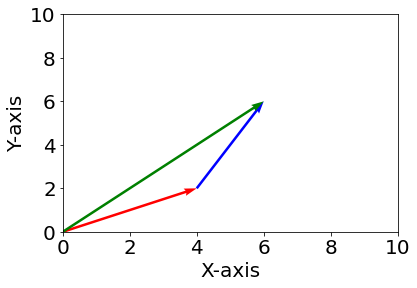

In [44]:
def draw(x, y): 
    xPlusy = (abs(x[0]+y[0]),abs(x[1]+y[1]))
    array = np.array([[0, 0, x[0], x[1]], 
                      [x[0], x[1], y[0], y[1]], 
                      [0, 0, xPlusy[0], xPlusy[1]]])
    print(array)
    X, Y, U, V = zip(*array)
    print("X =",X)
    print("Y =",Y)
    print("U =",U)
    print("V =",V)
    plt.figure()
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r','b','g'],scale=1)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    plt.draw()
    plt.show()
draw([4,2],[2,4])